In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
from scipy.optimize import curve_fit
from Variables import *
import matplotlib.ticker as ticker

'''Calculates the waiting times and their quantiles to locate the local minima for the three different parameters '''


#%% Collect the waiting times for the three different parameters in one list over all simulations and particles

DivergentWaitingTimes=[] # waiting times of the Divergent parameters
OverdampedWaitingTimes=[] # waiting times of the Overdamped parameters
DampedWaitingTimes=[] # waiting times of the Damped parameters
for s in range(sim):   
    DampedWaitingTimes_s=np.load(path+'NumberofIterations_s' + str(nameDamped) + str(s) + '.npy', allow_pickle=True)
    for i in range(n):
        for t in range(len(DampedWaitingTimes_s[i])):
            DampedWaitingTimes.append(DampedWaitingTimes_s[i][t])

#%%
for s in range(sim):  
    OverdampedWaitingTimes_s=np.load(path+'NumberofIterations_s' + str(nameOverdamped) + str(s) + '.npy', allow_pickle=True)
    for i in range(n):
        for t in range(len(OverdampedWaitingTimes_s[i])):
            OverdampedWaitingTimes.append(OverdampedWaitingTimes_s[i][t])
#%%
for s in range(sim): 
    DivergentWaitingTimes_s=np.load(path+'NumberofIterations_s' + str(nameDivergent) + str(s) + '.npy', allow_pickle=True)
    for i in range(n):
        for t in range(len(DivergentWaitingTimes_s[i])):
            DivergentWaitingTimes.append(DivergentWaitingTimes_s[i][t])


#%% To  reduce the size of the data set, take a random sample of 50000 waiting times for each parameter configuration

DivergentWaitingTimesSample=np.random.choice(DivergentWaitingTimes, 50000)
OverdampedWaitingTimesSample=np.random.choice(OverdampedWaitingTimes, 50000)

#%% 
DampedWaitingTimesSample=[]

# alternative code

for i in range(50000):
    s=np.random.randint(0, len(DampedWaitingTimes)-1)
    DampedWaitingTimesSample.append(DampedWaitingTimes[s])

DampedWaitingTimesSample=np.array(DampedWaitingTimesSample)


#%%  

# save results

np.save('./Results/DivergentWaitingTimesSample.npy', DivergentWaitingTimesSample)
np.save('./Results/OverdampedWaitingTimesSample.npy', OverdampedWaitingTimesSample)
np.save('./Results/DampedWaitingTimesSample.npy', DampedWaitingTimesSample)

#%%



KeyboardInterrupt: 

In [4]:

# load results

DivergentWaitingTimesSample=np.load('./Results/DivergentWaitingTimesSample.npy')
OverdampedWaitingTimesSample=np.load('./Results/OverdampedWaitingTimesSample.npy')
DampedWaitingTimesSample=np.load('./Results/DampedWaitingTimesSample.npy')


#%% Waiting times smaller than 1000

DivergentWaitingTimesSample=DivergentWaitingTimesSample[DivergentWaitingTimesSample<1000]
OverdampedWaitingTimesSample=OverdampedWaitingTimesSample[OverdampedWaitingTimesSample<1000]
DampedWaitingTimesSample=DampedWaitingTimesSample[DampedWaitingTimesSample<1000]

#%% Waiting times larger than 0


OverdampedWaitingTimesSample=OverdampedWaitingTimesSample[OverdampedWaitingTimesSample>0]
DampedWaitingTimesSample=DampedWaitingTimesSample[DampedWaitingTimesSample>0]
DivergentWaitingTimesSample=DivergentWaitingTimesSample[DivergentWaitingTimesSample>0]

#%% calculate the 0.95 quantile of OverdampedWaitingTimesSample, DivergentWaitingTimesSample and DampedWaitingTimesSample

quantileOverdamped=np.quantile(OverdampedWaitingTimesSample, 0.95)
quantileDivergent=np.quantile(DivergentWaitingTimesSample, 0.95)
quantileDamped=np.quantile(DampedWaitingTimesSample, 0.95)

print('Overdamped', quantileOverdamped, 'Damped',quantileDamped,'Divergent', quantileDivergent)

#%% Fit DampedWaitingTimes to Cauchy distribution 
# Fit a Cauchy distribution to the data:
paramDamped = cauchy.fit(DampedWaitingTimesSample)
paramOverdamped = cauchy.fit(OverdampedWaitingTimesSample)
paramDivergent = cauchy.fit(DivergentWaitingTimesSample)

#%%
X=np.linspace(0,1000,10000)
# Get the pdf from the cauchy distribution
pdf_fittedDamped = cauchy.pdf(X, *paramDamped)

# Get the pdf from the cauchy distribution
pdf_fittedOverdamped = cauchy.pdf(X, *paramOverdamped)

# Get the pdf from the cauchy distribution
pdf_fittedDivergent = cauchy.pdf(X, *paramDivergent)


Overdamped 7.0 Damped 16.0 Divergent 208.0


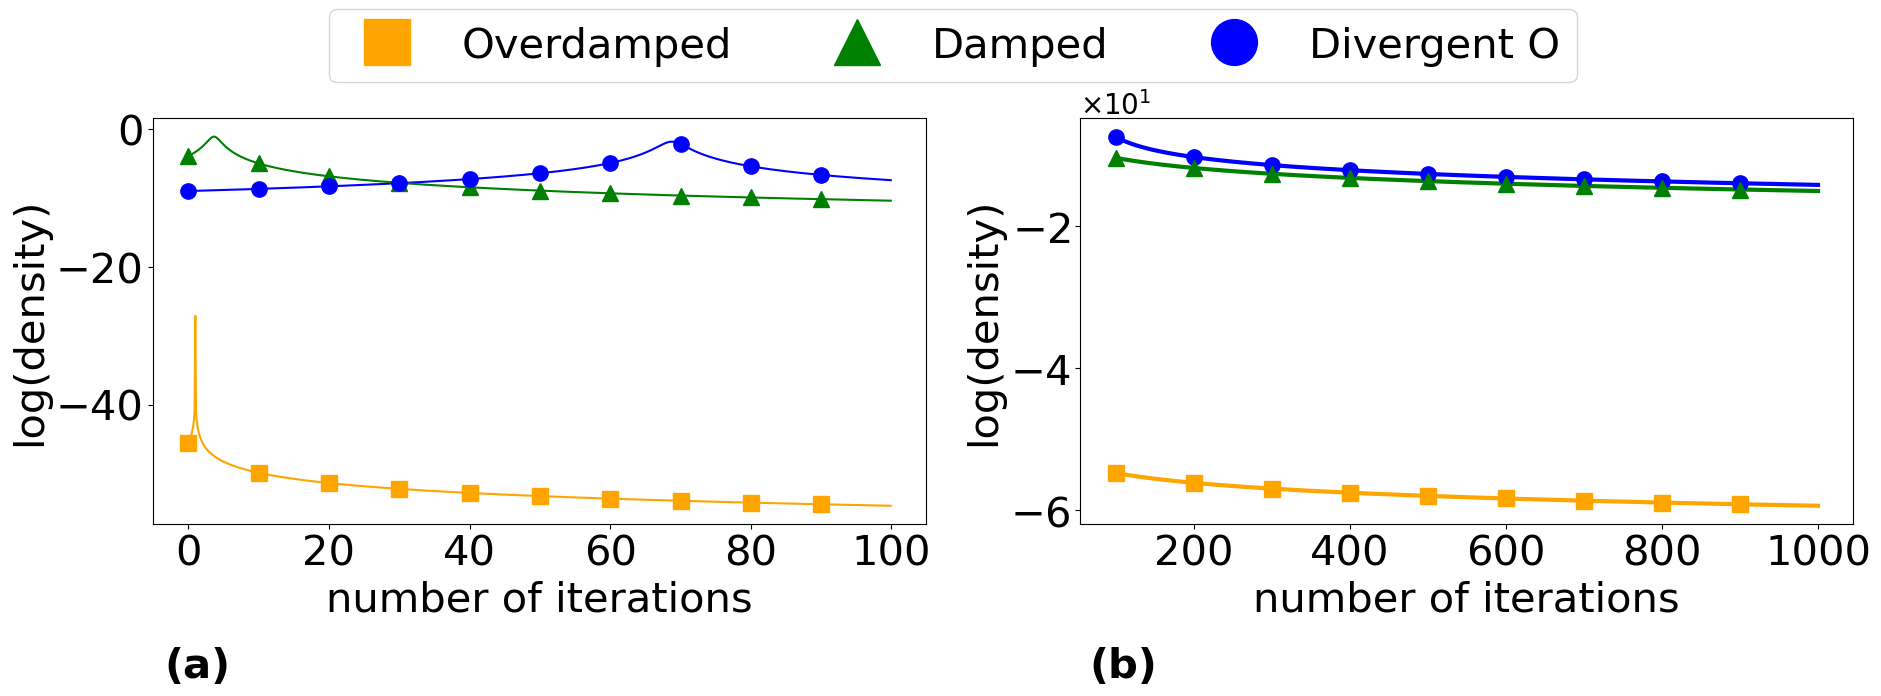

In [8]:

#%% Plot  pdf of the waiting times in short and long run for the three different parameters
legend_fontsize=30
fig, axs = plt.subplots(1, 2, figsize=(20,7))
plt.subplots_adjust(top=0.8, bottom=0.22,left=0.1, right=0.95)
axs[0].plot(X[0:1000], np.log(pdf_fittedOverdamped[0:1000]), color='orange')
axs[0].plot(X[0:1000], np.log(pdf_fittedDivergent[0:1000]), color='blue')
axs[0].plot(X[0:1000], np.log(pdf_fittedDamped[0:1000]), color='green')
axs[0].plot(X[0:1000], np.log(pdf_fittedOverdamped[0:1000]), 's',markevery=100, markersize=11, color='orange', label='Overdamped')
axs[0].plot(X[0:1000], np.log(pdf_fittedDamped[0:1000]),'^',markevery=100, markersize=11, color='green', label='Damped')
axs[0].plot(X[0:1000], np.log(pdf_fittedDivergent[0:1000]),'o', markevery=100, markersize=11,color='blue', label='Divergent O')

axs[0].tick_params(axis='x', labelsize=30)
axs[0].tick_params(axis='y', labelsize=30)
axs[0].set_ylabel('log(density)',  fontsize=30)
axs[0].set_xlabel('number of iterations',fontsize=30)

axs[1].plot(X[1000:10000], np.log(pdf_fittedOverdamped[1000:10000]), linewidth=3, color='orange')
axs[1].plot(X[1000:10000], np.log(pdf_fittedDivergent[1000:10000]), linewidth=3,color='blue' )
axs[1].plot(X[1000:10000], np.log(pdf_fittedDamped[1000:10000]), linewidth=3,color='green')
axs[1].plot(X[1000:10000], np.log(pdf_fittedOverdamped[1000:10000]),'s',markevery=1000, markersize=11, color='orange', label='Overdamped')
axs[1].plot(X[1000:10000], np.log(pdf_fittedDivergent[1000:10000]), 'o', markevery=1000, markersize=11,color='blue', label='Divergent O')
axs[1].plot(X[1000:10000], np.log(pdf_fittedDamped[1000:10000]),'^',markevery=1000, markersize=11, color='green', label='Damped')
axs[1].tick_params(axis='x', labelsize=30)
axs[1].tick_params(axis='y', labelsize=30)
axs[1].set_xlabel('number of iterations', fontsize=30)
axs[1].set_ylabel('log(density)', fontsize=30)
axs[1].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
axs[1].set_xlabel('number of iterations', fontsize=30)
axs[1].yaxis.offsetText.set_fontsize(20)
axs[0].legend(bbox_to_anchor=(0.2, 1.02, 1, 0.3), loc="upper left",
               ncol=3,  prop={'size': legend_fontsize}, markerscale=3)

axs[0].text(0.1, -0.3, '(a)', transform=axs[0].transAxes, fontsize=30, va='top', ha='right',weight='bold')
axs[1].text(0.1, -0.3, '(b)', transform=axs[1].transAxes, fontsize=30, va='top', ha='right',weight='bold')
plt.savefig('./Plots/Fig15.png')